In [37]:
# import requests
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from mpl_toolkits.mplot3d import Axes3D

# # Raw GitHub URL
# #url = "https://raw.githubusercontent.com/username/repository/branch/filename.tif"
# url = "https://github.com/ufcolemanlab/NMCoop_Shared/raw/main/%23Febo/plotting_3d/tztack_8bit.tif"

# # Send GET request to retrieve file
# response = requests.get(url)

# # Save file to local disk
# with open("tztack_8bit.tif", "wb") as f:
#     f.write(response.content)

    
# # Load data
# img = plt.imread(url)
# # imshow(img[:, :, 71]) 
# imshow(img)

In [39]:
import os
import requests
from PIL import Image

# Raw GitHub URL
#url = "https://raw.githubusercontent.com/username/repository/branch/filename.tif"
url = "https://github.com/ufcolemanlab/NMCoop_Shared/raw/main/%23Febo/plotting_3d/tztack_8bit.tif"

# Send GET request to retrieve file
response = requests.get(url)

# Get the filename from the URL
filename = url.split("/")[-1]

# Path to local Downloads folder
downloads_folder = os.path.join(os.path.expanduser("~"), "Documents")
# /Users/jcoleman/Downloads/tztack_8bit.tif

# Save file to local Downloads folder
with open(os.path.join(downloads_folder, filename), "wb") as f:
    f.write(response.content)

# # Open the file locally
# # Load data
# #img = plt.imread('image.tif')
# img = Image.open(os.path.join(downloads_folder, filename))
# # img[:, :, 71] #see def() below for slice-extraction
# img.show()



In [46]:
def get_tif_slice(tif_path, slice_index):
    """
    Returns a PIL Image object representing the specified slice of a TIFF file.

    Args:
        tif_path (str): Path to the TIFF file.
        slice_index (int): Index of the slice to retrieve (0-based).

    Returns:
        PIL Image object representing the specified slice.
    """
    img = Image.open(tif_path)
    img.seek(slice_index)
    return img

# Example usage:
# Works for Mac OS
tif_path = os.path.join(downloads_folder, filename) # 'path/to/file.tif'
slice_index = 50
slice_img = get_tif_slice(tif_path, slice_index)
slice_img.show()
print("Path: " + tif_path)

Path: /Users/jcoleman/Documents/tztack_8bit.tif


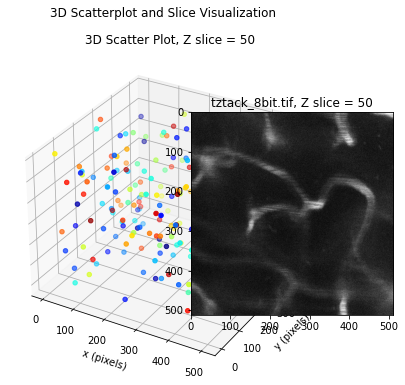

In [47]:
# Load or generate ROI data - IN PROGRESS IMG NOT IN PLANE
def load_roi_data():
    num_points = 200
    x = np.random.randint(1, 512, num_points)
    y = np.random.randint(1, 512, num_points)
    z = np.random.randint(1, 300, num_points)
    fwhm = np.random.rand(num_points) * 10  # Random FWHM values between 0 and 10
    return x, y, z, fwhm

x, y, z, fwhm = load_roi_data()

# Create figure
fig = plt.figure(figsize=(8, 6))

# Subplot 2: 3D scatter plot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=fwhm, cmap='jet', marker='o')
#ax.set_zdir('reverse')  # Invert Z-axis
ax.set_zlim(-20, 300)
ax.set_xlabel('x (pixels)')
ax.set_ylabel('y (pixels)')
ax.set_zlabel('z (microns)')
ax.set_title('3D Scatter Plot, Z slice = ' + str(slice_index))

# Plot image in same plane as 3D scatter plot
ax2 = fig.add_subplot(122)
#ax2.imshow(img[:, :, 71], cmap='gray')
ax2.imshow(slice_img, cmap='gray')

ax2.set_title(filename + ', Z slice = ' + str(slice_index))

# Overall figure title
fig.suptitle('3D Scatterplot and Slice Visualization')

plt.show()

In [81]:
import napari

# Create a Napari viewer
viewer = napari.Viewer()

# Add some data to the viewer (optional)
# viewer.add_image(your_image_data)

# Display the viewer in the Jupyter Notebook
viewer.show()